In [27]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(ggsci)
library(monocle)
library(pheatmap)
library(RColorBrewer)

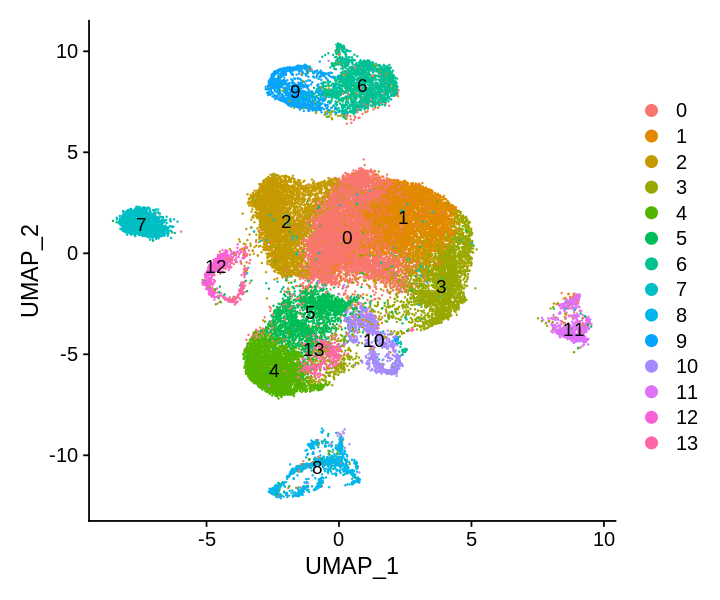

In [28]:
options(repr.plot.height = 5, repr.plot.width = 6)
load(file = '/data/Matthew/scrna/02.Clustering/crov7_alv_mincell5.Rdata')
DimPlot(seurat_obj, reduction = "umap", label = TRUE)

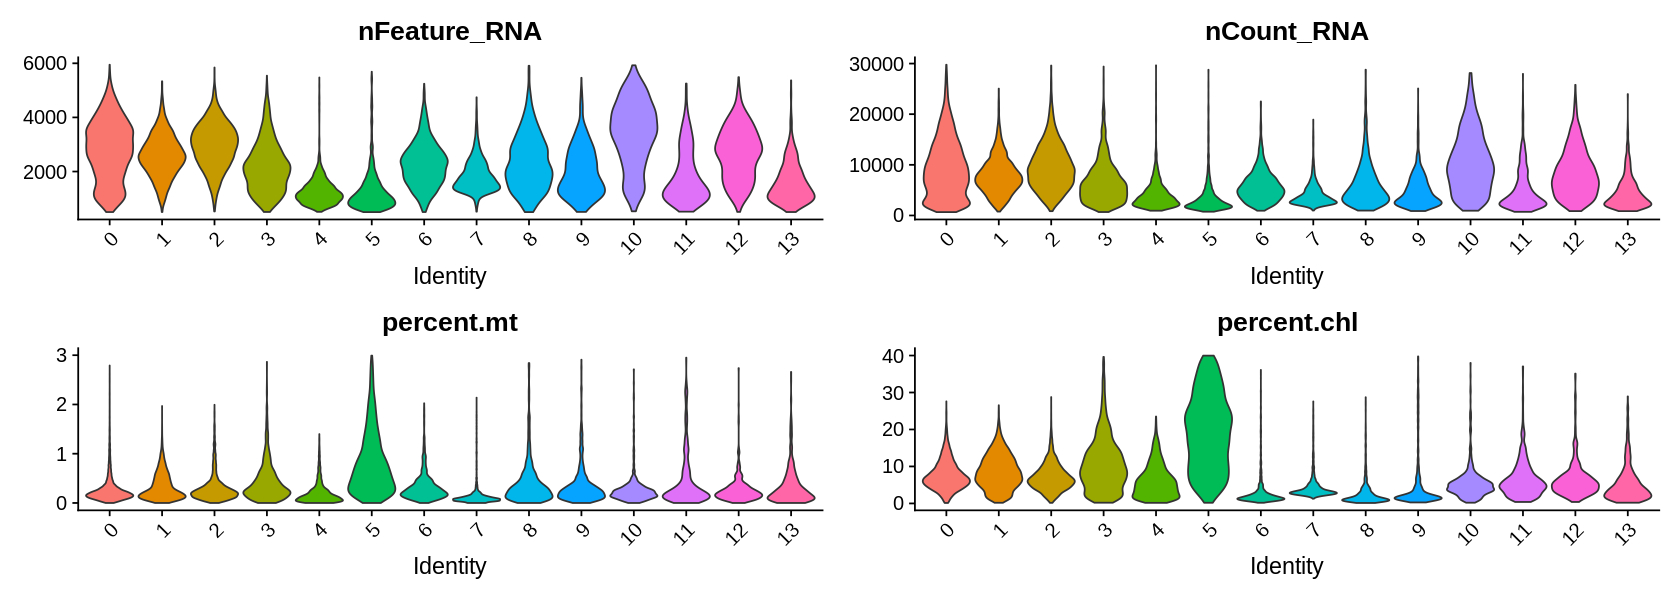

In [29]:
options(repr.plot.height = 5, repr.plot.width = 14)
VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt", "percent.chl"), ncol = 2, pt.size = 0)

In [30]:
id_path <- '/data/Matthew/scrna/02.Clustering/id_latest/'
chl <- readLines(paste(id_path, 'allcp.gene.id',sep = '/'))

seurat_obj[["percent.allchl"]] <- PercentageFeatureSet(seurat_obj, features = intersect(chl, rownames(seurat_obj)))

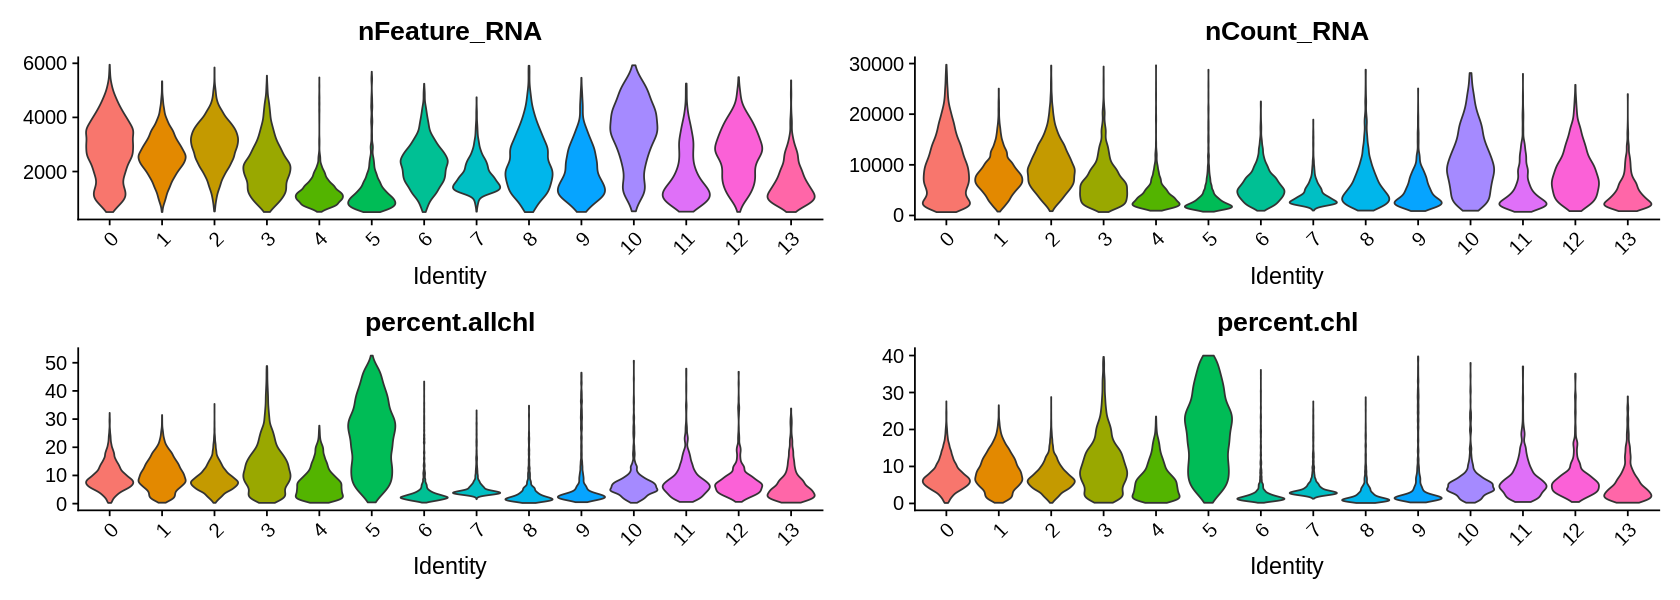

In [31]:
VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.allchl", "percent.chl"), ncol = 2, pt.size = 0)

In [32]:
avg_exp <- AverageExpression(seurat_obj)
head(avg_exp$RNA)
write.csv(avg_exp, file = 'avg_exp_numcluster.csv')

0           1           2            3            4          
EVM0032325 0.087850195 0.053027359 0.1079744356 0.0845980768 0.011454173
EVM0015844 0.001087122 0.001165855 0.0011535972 0.0025815783 0.001226910
EVM0031208 0.001325306 0.001069940 0.0008798874 0.0004653548 0.001252135
EVM0000976 0.008129387 0.007387489 0.0041813226 0.0136546630 0.005314983
EVM0034578 0.408207771 0.497804659 0.3752944867 0.6297128497 0.294884581
EVM0033217 0.042274156 0.095925437 0.0411883199 0.1116009605 0.044543653
           5           6           7            8           9          
EVM0032325 0.045950030 0.146226738 0.2014436070 0.090124800 0.046973838
EVM0015844 0.001926211 0.007134277 0.0026899607 0.005050933 0.003162044
EVM0031208 0.003949675 0.003239643 0.0004827077 0.000000000 0.001911911
EVM0000976 0.042120149 0.014103322 0.0027479785 0.011118561 0.014797490
EVM0034578 1.161763863 0.518740812 0.1731578057 0.576205409 0.565953703
EVM0033217 0.153534544 0.063638147 0.0169092026 0.112314856 0.082201808
           10           11           12          13         
EVM0032325 0.0515349536 2.177705e-02 0.095360384 0.033967134
EVM0015844 0.0007529295 8.064185e-06 0.002679724 0.001205012
EVM0031208 0.0002931374 0.000000e+00 0.004450743 0.000000000
EVM0000976 0.0091996960 1.353965e-02 0.008507146 0.006150453
EVM0034578 0.3610336307 4.088677e-01 0.349610303 0.287139213
EVM0033217 0.0173528175 5.023944e-02 0.070067143 0.073721759

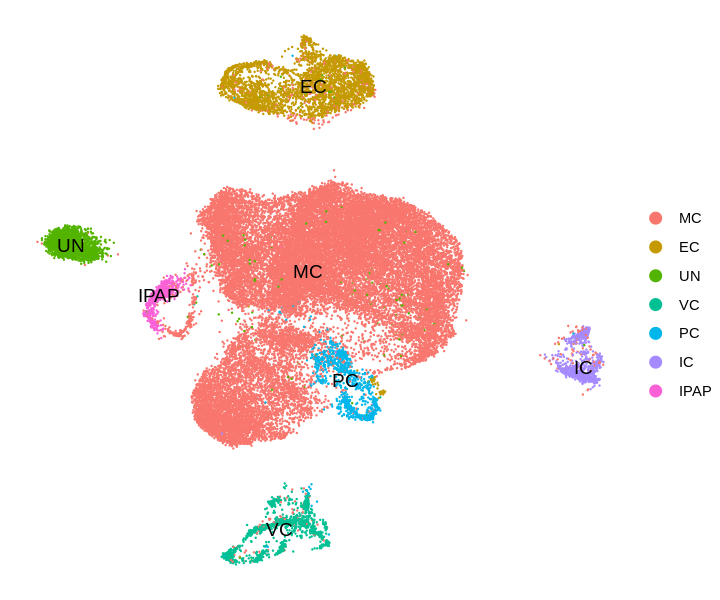

In [33]:
options(repr.plot.height = 5, repr.plot.width = 6)
# Alevin all ath
new.cluster.ids <- c("MC", "MC", "MC", "MC", "MC",
                     "MC", "EC", "UN", "VC", "EC",
                     "PC", "IC", "IPAP", "MC")

# Add seurat object levels to new.cluster.ids
names(new.cluster.ids) <- levels(seurat_obj)
# Rename clusters
seurat_obj <- RenameIdents(seurat_obj, new.cluster.ids)
seurat_obj[["old.ident"]] <- Idents(object = seurat_obj)
DimPlot(seurat_obj, reduction = "umap", label = TRUE) + theme_void()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3005
Number of edges: 99853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8354
Number of communities: 6
Elapsed time: 0 seconds


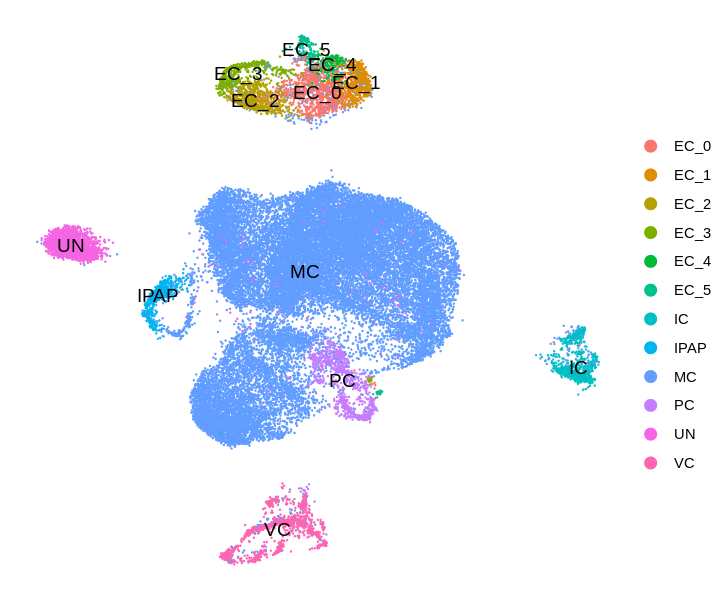

In [34]:
for (i in c("EC")) {
  seurat_obj <- FindSubCluster(seurat_obj, cluster = i, graph.name = "RNA_snn", resolution = 0.4, algorithm = 1)
  sub_name <- as.factor(seurat_obj@meta.data$sub.cluster)
  names(sub_name) <- names(seurat_obj@active.ident)
  seurat_obj@active.ident <- sub_name
}
# add name to clusters
seurat_obj[["seurat_clusters"]] <- seurat_obj@active.ident

options(repr.plot.height = 5, repr.plot.width = 6)
DimPlot(seurat_obj, reduction = "umap", label = TRUE) + theme_void()

In [35]:
table(seurat_obj@active.ident)


 EC_0  EC_1  EC_2  EC_3  EC_4  EC_5    IC  IPAP    MC    PC    UN    VC 
  951   596   573   478   222   185   806   572 26086   890  1915  1118 

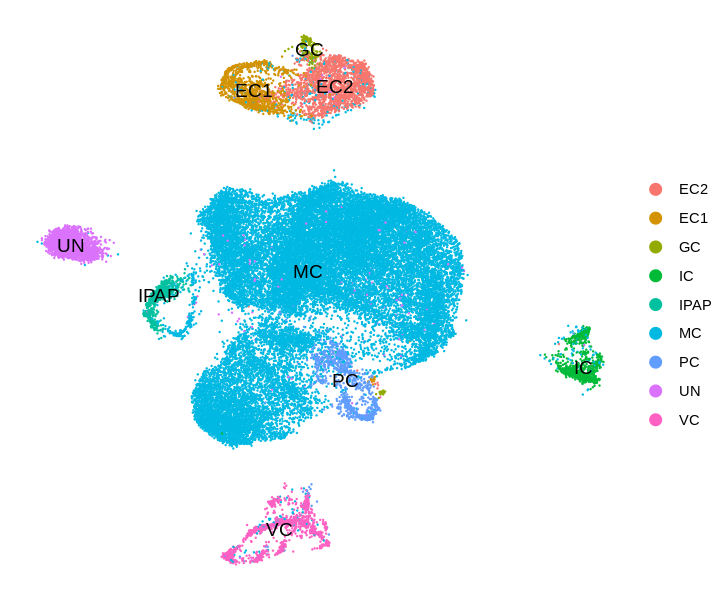

In [36]:
options(repr.plot.height = 5, repr.plot.width = 6)
# res 0.4
new.cluster.ids <- c("EC2", "EC2", "EC1", "EC1", "EC2",
                     "GC", "IC", "IPAP", "MC",
                     "PC", "UN", "VC")
# res 0.7
# new.cluster.ids <- c("EC2", "EC2", "EC1", "EC2", "EC1", "EC1", "EC2",
#                      "GC", "IC", "IPAP", "MC",
#                      "PC", "UN", "VC")
# Add seurat object levels to new.cluster.ids
names(new.cluster.ids) <- levels(seurat_obj)
# Rename clusters
seurat_merge <- RenameIdents(seurat_obj, new.cluster.ids)
# seurat_obj[["old.ident"]] <- Idents(object = seurat_obj)
DimPlot(seurat_merge, reduction = "umap", label = TRUE) + theme_void()

In [37]:
table(seurat_merge@active.ident)


  EC2   EC1    GC    IC  IPAP    MC    PC    UN    VC 
 1769  1051   185   806   572 26086   890  1915  1118 

In [38]:
avg_exp <- AverageExpression(seurat_merge)
head(avg_exp$RNA)
write.csv(avg_exp, file = 'avg_exp_renamecluster.csv')

EC2         EC1         GC          IC           IPAP       
EVM0032325 0.145711612 0.047197310 0.147200388 2.177705e-02 0.095360384
EVM0015844 0.007684792 0.003177087 0.001677343 8.064185e-06 0.002679724
EVM0031208 0.002943547 0.001921007 0.005983402 0.000000e+00 0.004450743
EVM0000976 0.013676467 0.014867887 0.017803805 1.353965e-02 0.008507146
EVM0034578 0.512177047 0.560728620 0.612464746 4.088677e-01 0.349610303
EVM0033217 0.061735211 0.078746285 0.101967155 5.023944e-02 0.070067143
           MC          PC           UN           VC         
EVM0032325 0.071217708 0.0515349536 0.2014436070 0.090124800
EVM0015844 0.001377430 0.0007529295 0.0026899607 0.005050933
EVM0031208 0.001259607 0.0002931374 0.0004827077 0.000000000
EVM0000976 0.010216670 0.0091996960 0.0027479785 0.011118561
EVM0034578 0.489490984 0.3610336307 0.1731578057 0.576205409
EVM0033217 0.070436132 0.0173528175 0.0169092026 0.112314856

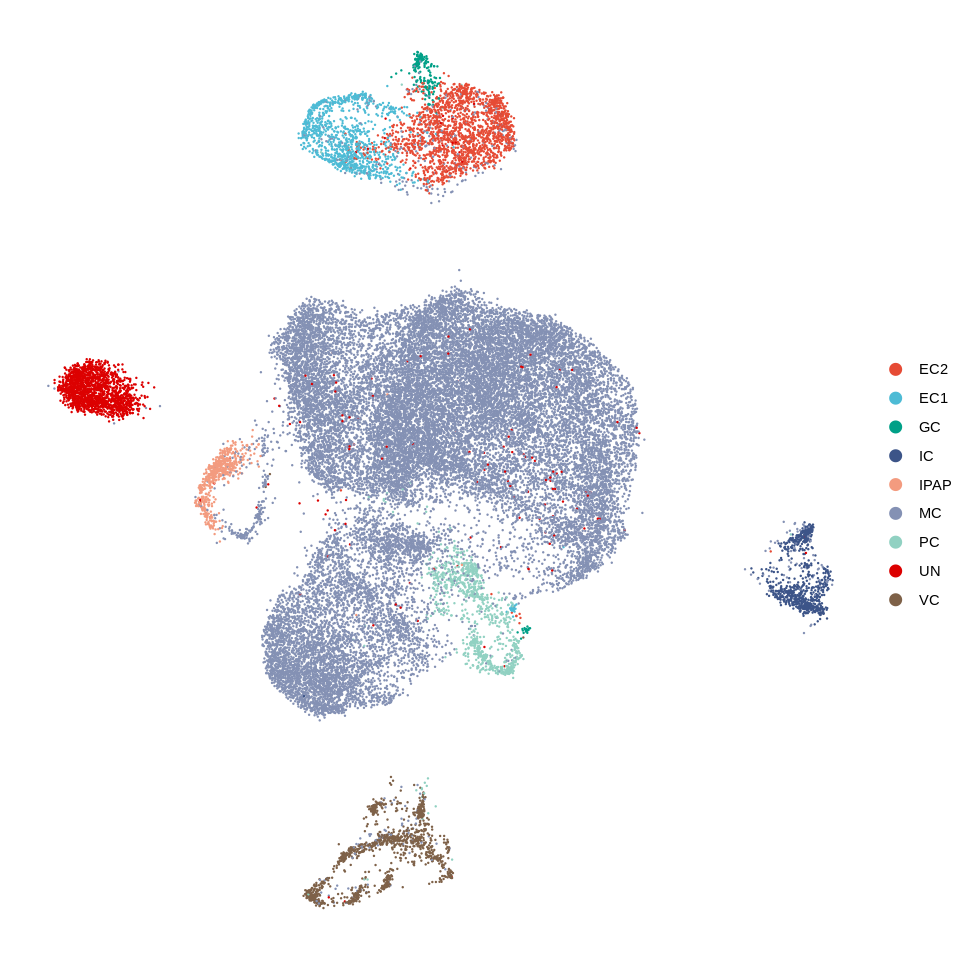

In [39]:
options(repr.plot.height = 8, repr.plot.width = 8)
DimPlot(seurat_merge, reduction = "umap") + theme_void() + scale_color_npg()

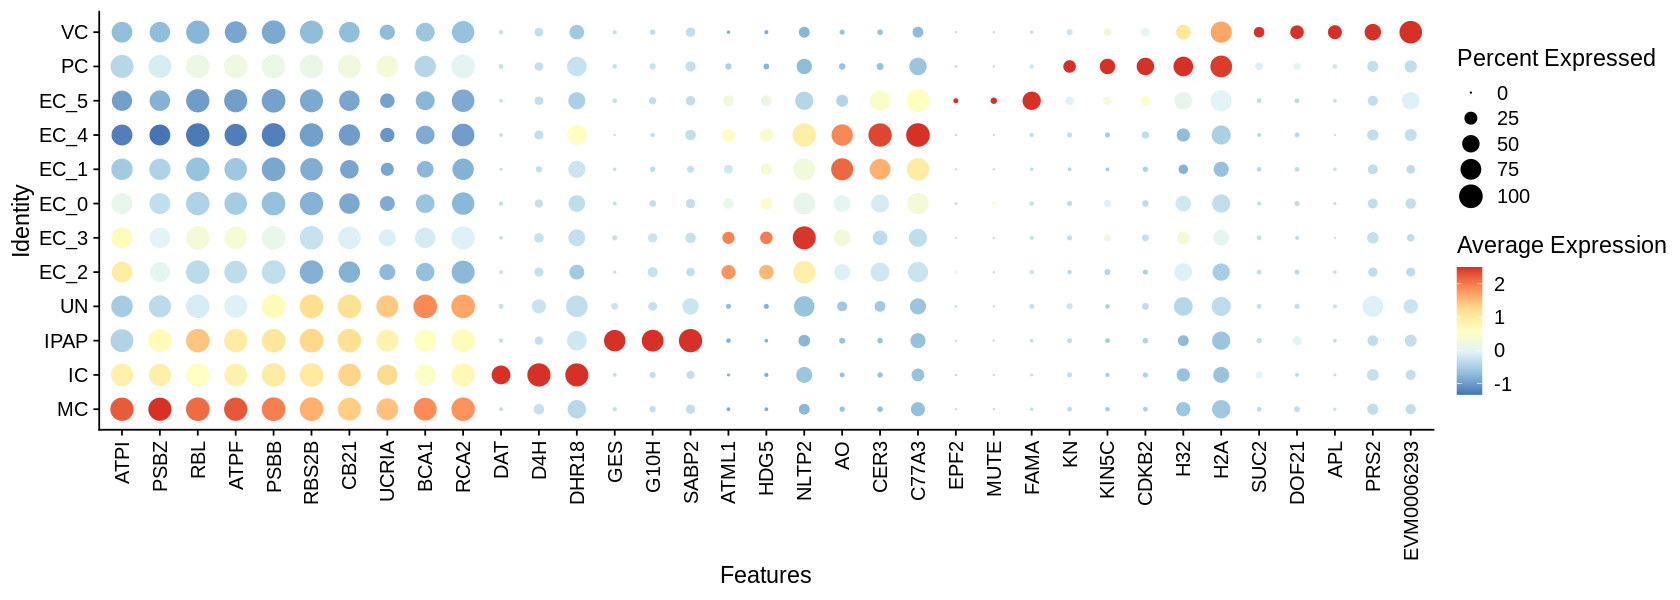

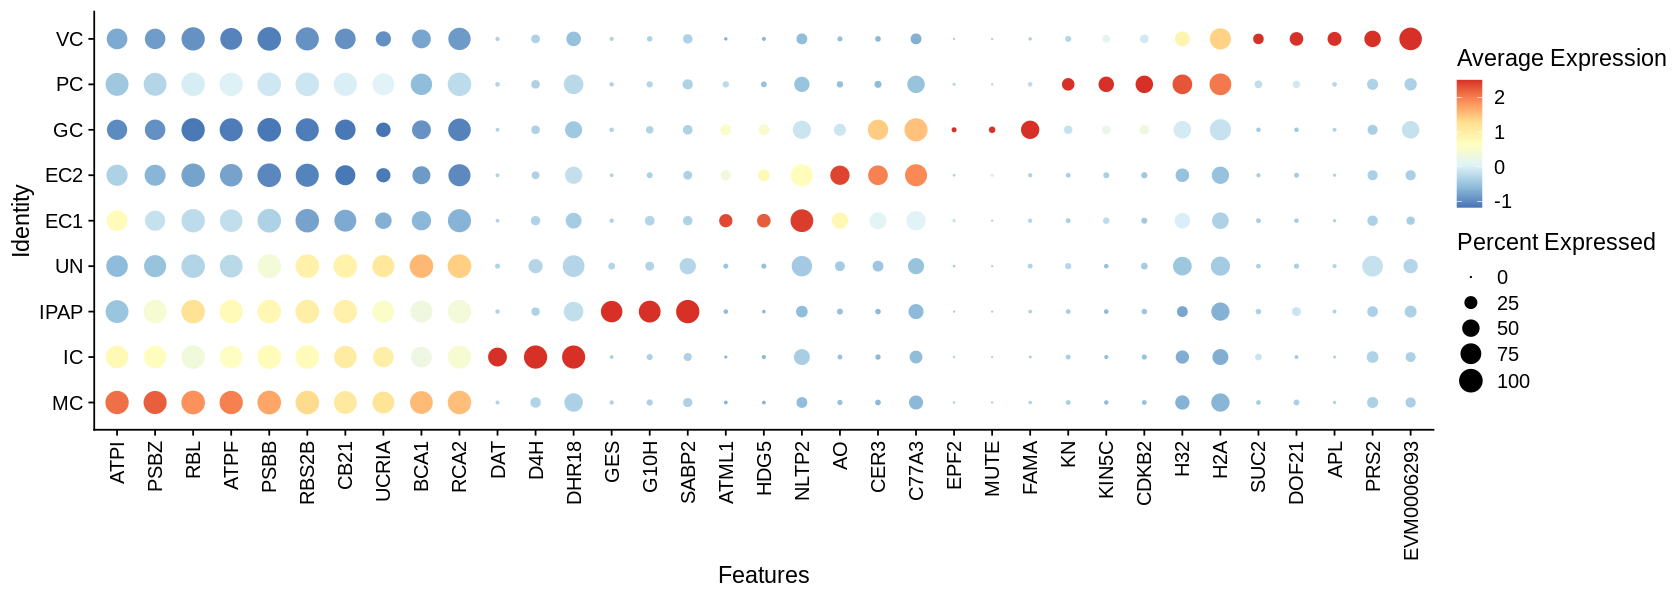

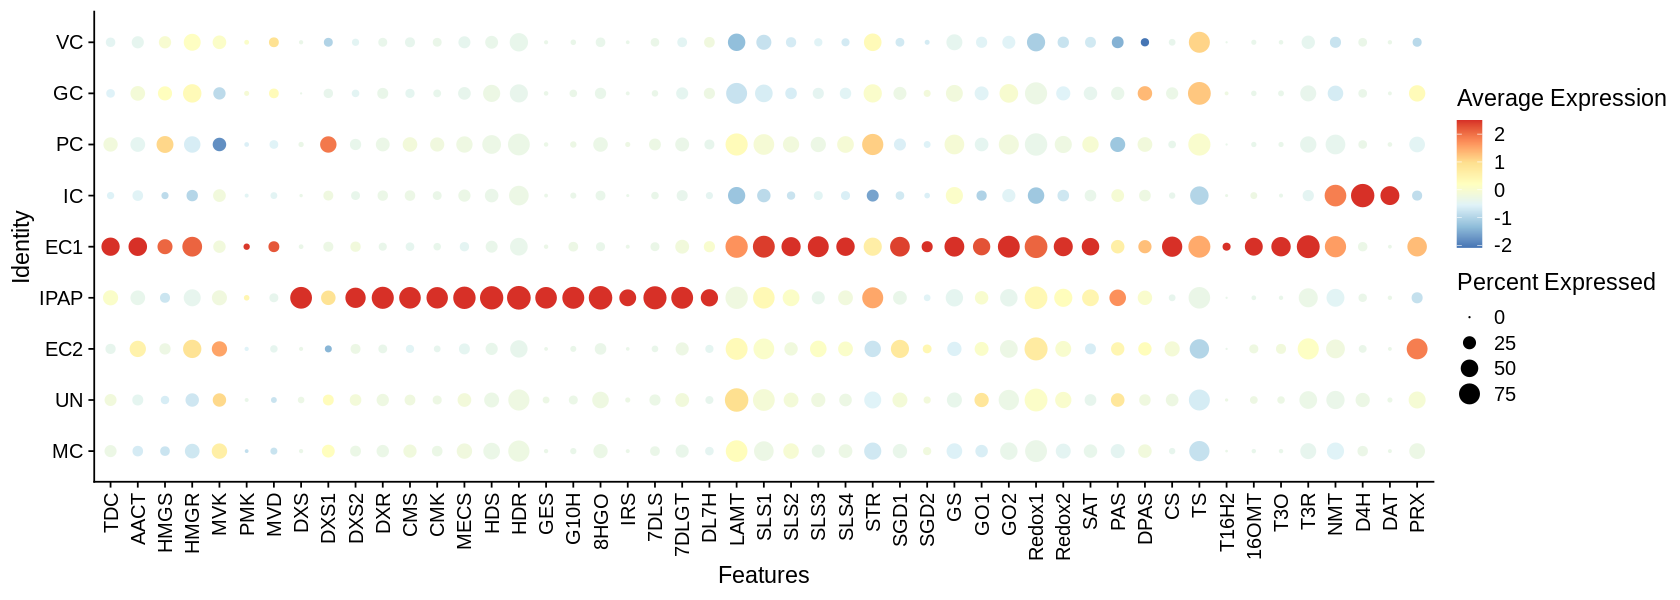

In [40]:
options(repr.plot.height = 5, repr.plot.width = 14)
id_path <- '/data/Matthew/scrna/02.Clustering/id_latest/'
celltype <- readLines(paste(id_path, "celltype.id",sep = "/"))
cellname <- readLines(paste(id_path, "celltype.name",sep = "/"))
pathway_id <- readLines(paste(id_path, "pathway_all_alkaloids.id",sep = "/"))
pathway_name <- readLines(paste(id_path, "pathway_all_alkaloids.name",sep = "/"))

cluster_order <- c("MC", "IC", "IPAP", "UN",
                   "EC_2", "EC_3", "EC_0", "EC_1", "EC_4", "EC_5",
                   "PC", "VC")

DotPlot(seurat_obj, features = celltype, cols = "RdYlBu", scale.by = "size") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  scale_x_discrete(labels = cellname) +
  scale_y_discrete(limits = cluster_order)
ggsave("celltype_sub.pdf", height = 5, width = 14)

cluster_order <- c("MC", "IC", "IPAP", "UN", "EC1", "EC2", "GC", "PC", "VC")

DotPlot(seurat_merge, features = celltype, cols = "RdYlBu", scale.by = "size") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  scale_x_discrete(labels = cellname) +
  scale_y_discrete(limits = cluster_order)
ggsave("celltype.pdf", height = 5, width = 14)


cluster_order <- c("MC", "UN","EC2", "IPAP", "EC1", "IC", "PC", "GC", "VC")
DotPlot(seurat_merge, features = pathway_id, cols = "RdYlBu", scale.by = "size") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  scale_x_discrete(labels = pathway_name) +
  scale_y_discrete(limits = cluster_order)
ggsave("pathway.pdf", height = 5, width = 14)


In [44]:
id_path <- '/data/Matthew/scrna/02.Clustering/id_latest/'
vc.id <- readLines(paste(id_path, 'ec-psd.id',sep = '/'))
vc.name <- readLines(paste(id_path, 'ec-psd.name',sep = '/'))

In [45]:
magic_obj <- seurat_obj
DefaultAssay(magic_obj) <- "MAGIC_RNA"
magic_sub <- subset(magic_obj,idents = c("EC_0","EC_1","EC_2","EC_3","EC_4"))

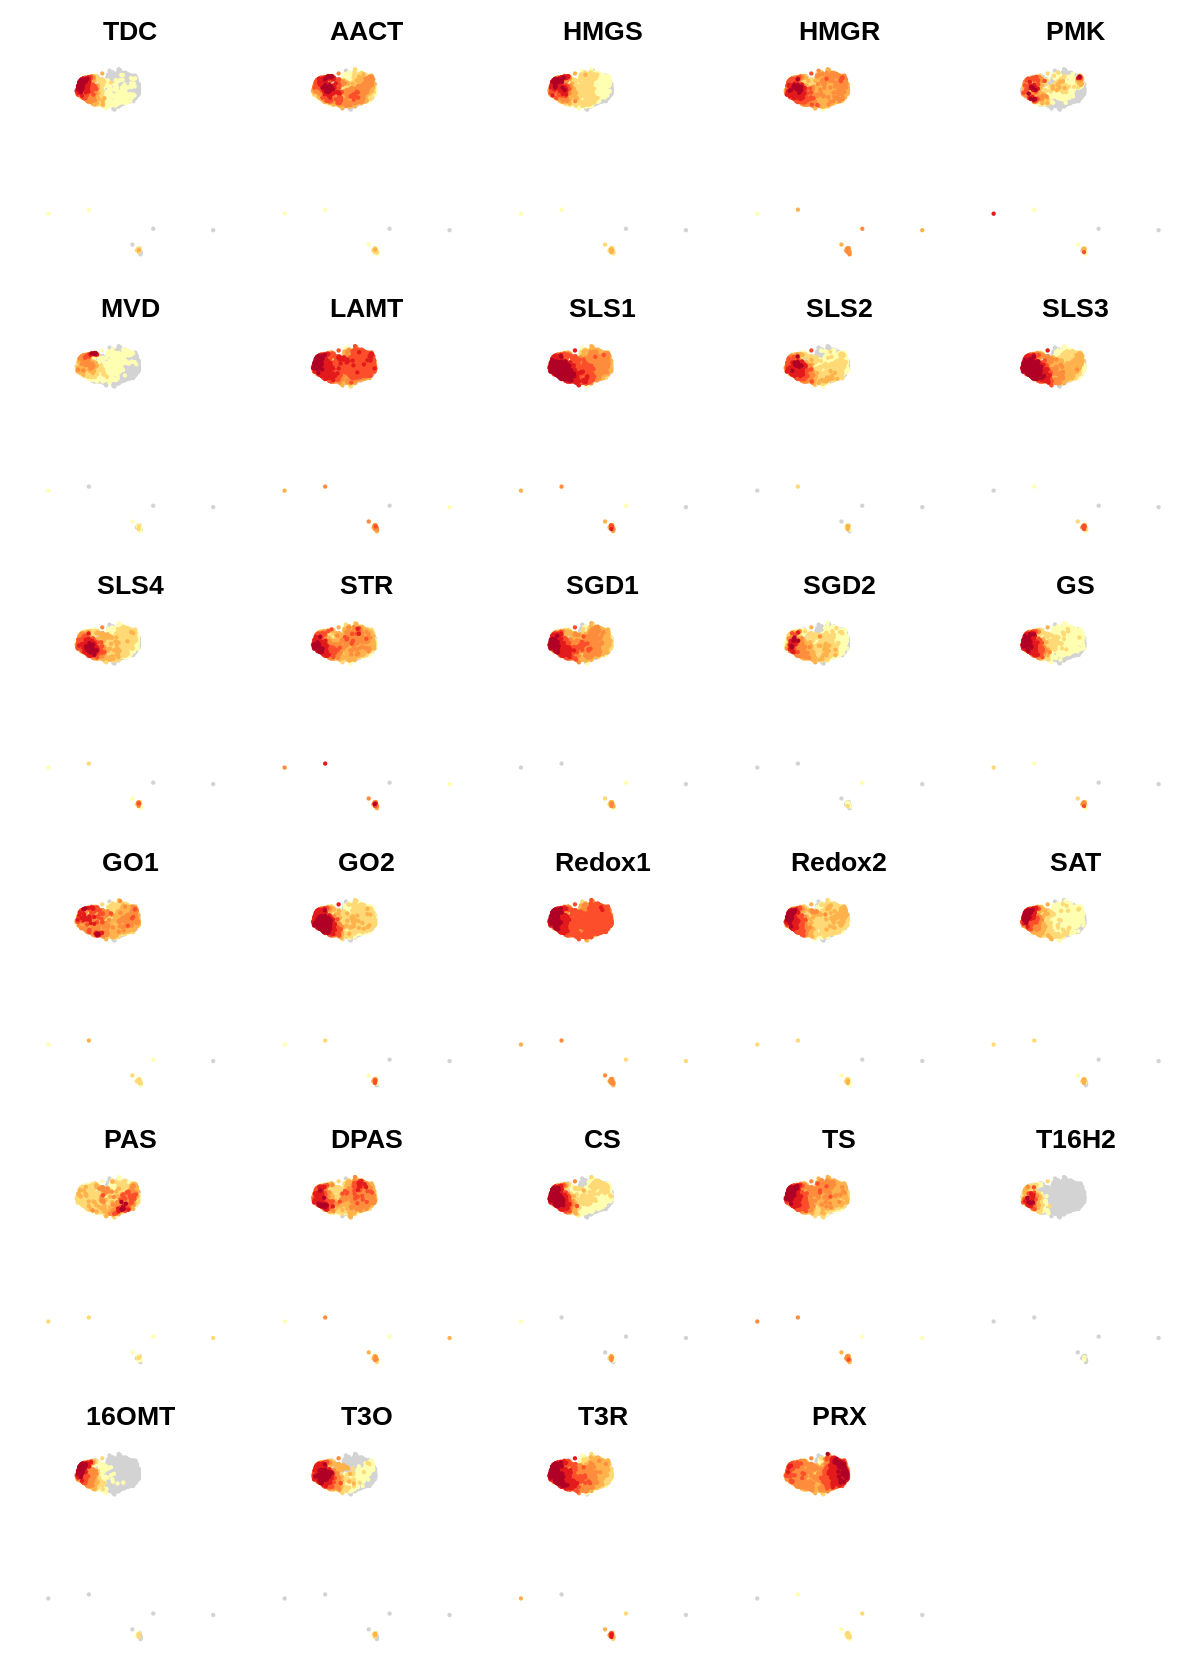

In [46]:
options(repr.plot.height = 14, repr.plot.width = 10)
p7 <- FeaturePlot(magic_sub,
                  features = vc.id,
                  cols = c("lightgrey", brewer.pal(7, "YlOrRd")),
                  ncol = 5, order = T) & NoAxes() & NoLegend()
for (i in 1:length(vc.id)) p7[[i]]$labels$title = vc.name[i]
p7
# ggsave('panels/ecpsd_FeaturePlot.png', p7, height = 21, width = 15)

# Testing EC

In [47]:
options(repr.plot.height = 6, repr.plot.width = 15)

# seurat_sub <- subset(seurat_obj,
#                      idents = c("6_3", "6_4",
#                                 "13_0", "13_3"))
seurat_sub <- subset(seurat_obj,
                     idents = c("EC_0","EC_1","EC_2","EC_3","EC_4"))

Distance cutoff calculated to 1.129047 


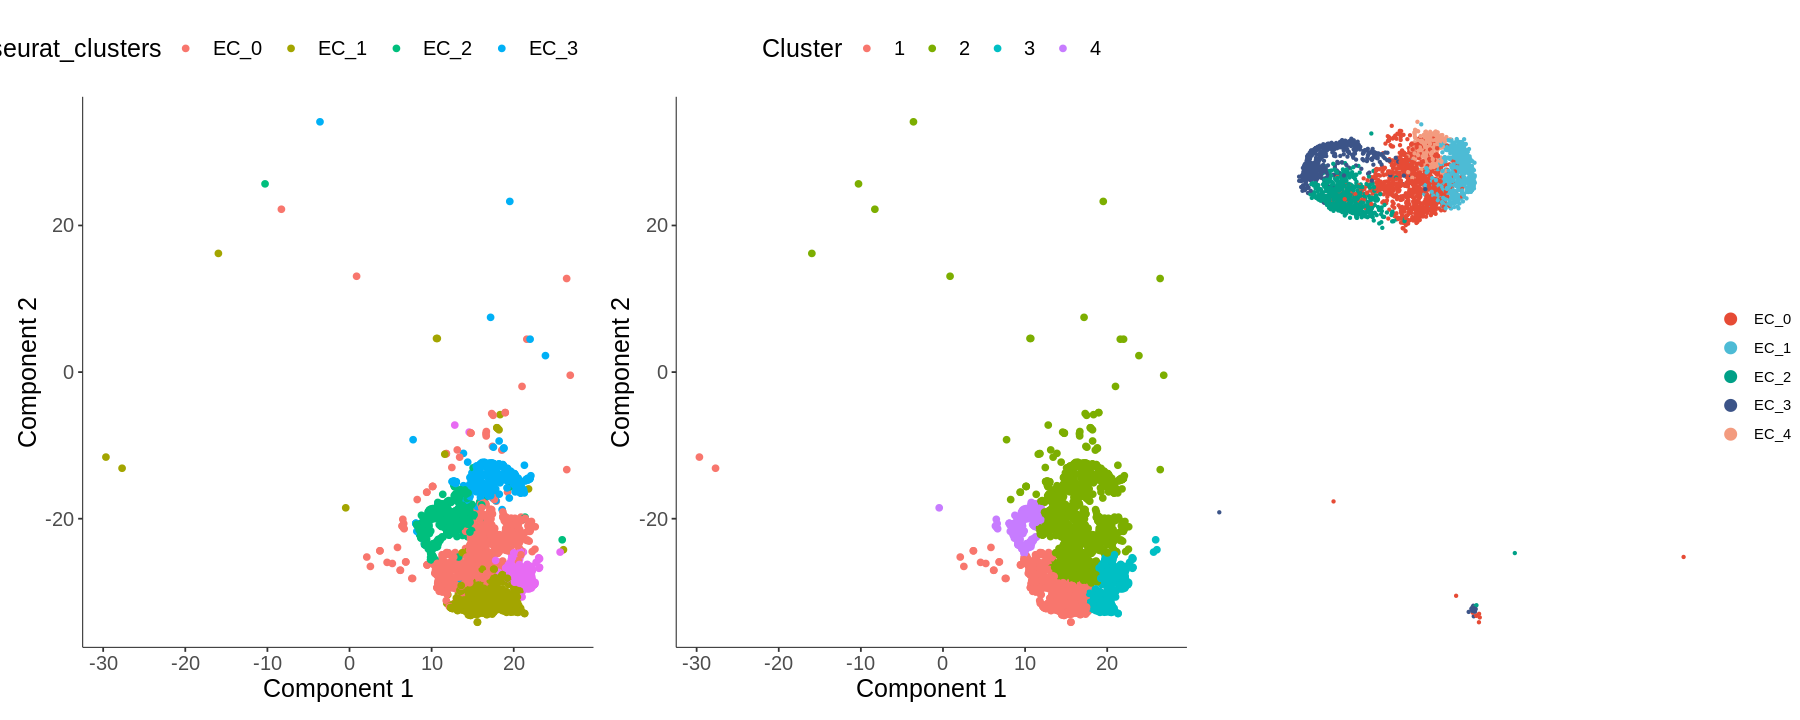

In [48]:
# DimPlot(seurat_sub, reduction = "umap", label = TRUE)
# transform from Seurat object to CellDataSet
cds <- as.CellDataSet(seurat_sub, assay = "RNA", reduction = "tsne")
# cds <- importCDS(seurat_sub)
# do a basic clustering for plot
cds <- clusterCells(cds)
# plot clusters
p1 <- plot_cell_clusters(cds, color_by = "seurat_clusters")
p2 <- plot_cell_clusters(cds)
p3 <- DimPlot(seurat_sub,
              reduction = "umap",
#               label = F,
#               pt.size = 1,
#               label.box = F,
#               label.color = "black",
#               label.size = 3
             ) +
        theme_void() + scale_color_npg()
p1 + p2 + p3

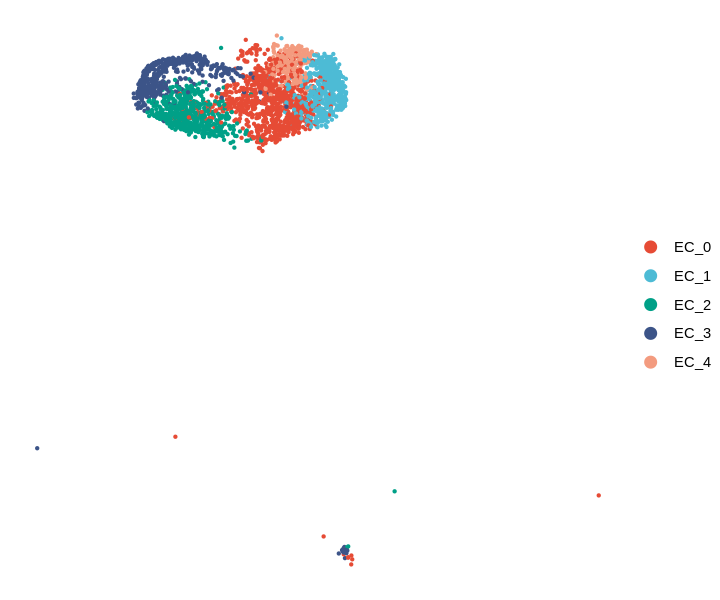

In [49]:
options(repr.plot.height = 5, repr.plot.width = 6)
p3
ggsave("ec_sub.umap.pdf", height = 5, width = 6)

## Trajectory step 1: choose genes that define a cell's progress

### Method 1: Ordering based on genes that differ between clusters

In [50]:
cds@expressionFamily@vfamily <- "negbinomial.size"
cds <- estimateSizeFactors(cds)
cds <- estimateDispersions(cds)

Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Removing 106 outliers



In [51]:
cds <- detectGenes(cds, min_expr = 0.1)
expressed_genes <-  row.names(subset(fData(cds), num_cells_expressed >= 10))

In [52]:
clustering_deg_genes <-
    differentialGeneTest(cds[expressed_genes,],
          fullModelFormulaStr = "~seurat_clusters",
          cores = 20)

In [53]:
options(warn = -1)

ordering_genes <- row.names(clustering_deg_genes)[order(clustering_deg_genes$qval)][1:1000]
cds <- setOrderingFilter(cds, ordering_genes = ordering_genes)
cds <- reduceDimension(cds, method = "DDRTree")
cds <- orderCells(cds)

options(warn = 0)

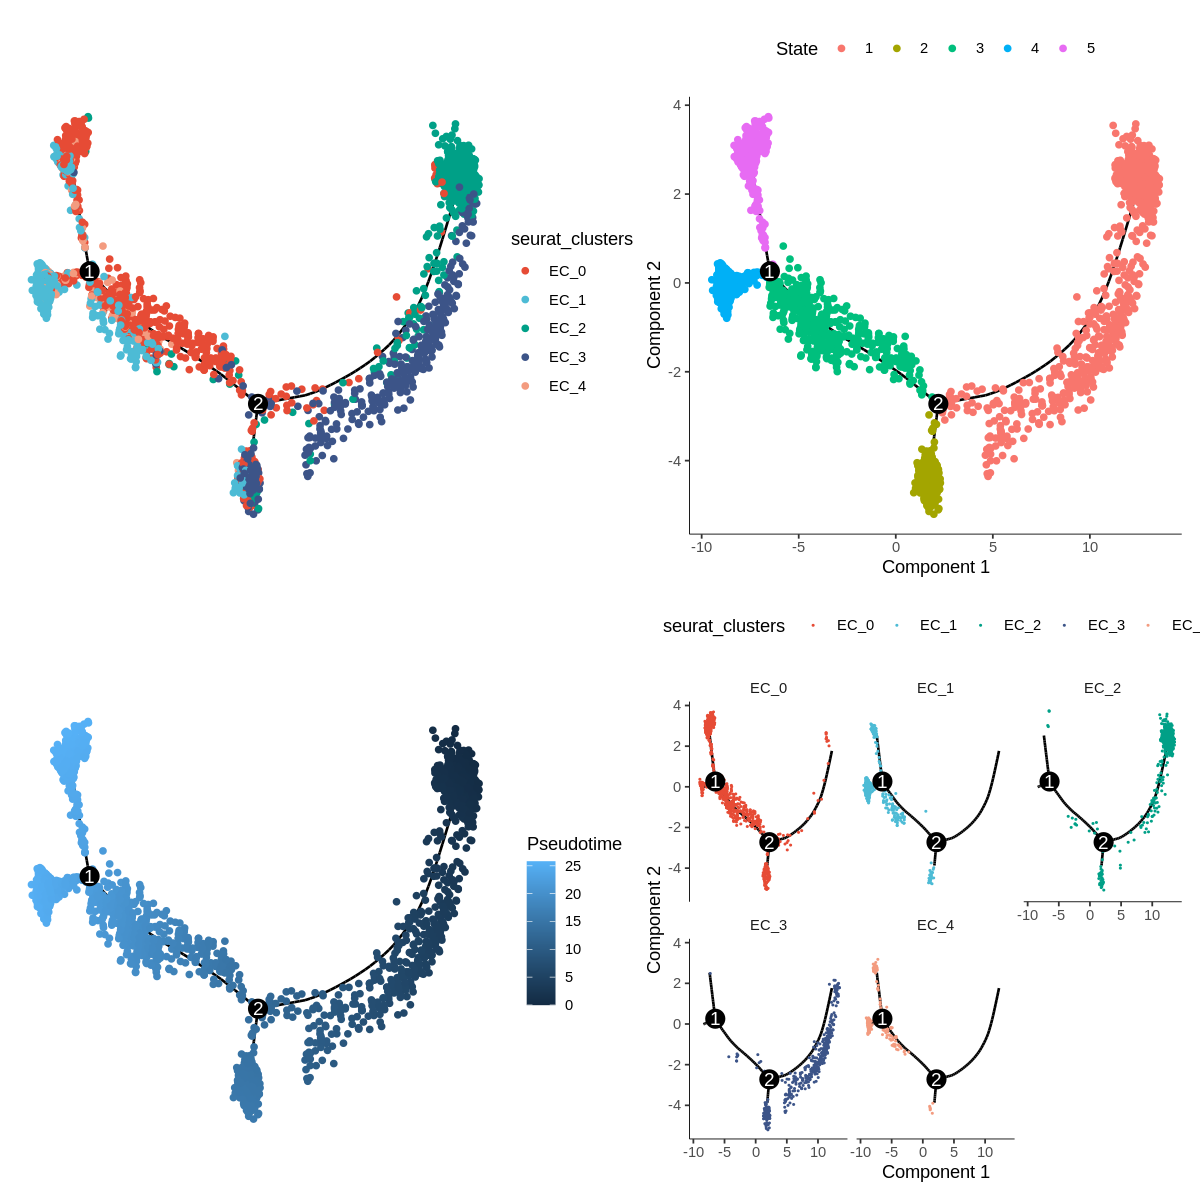

In [54]:
# options(repr.plot.height = 5, repr.plot.width = 5)
# plot_ordering_genes(cds)
options(repr.plot.height = 10, repr.plot.width = 10)
p1 <- plot_cell_trajectory(cds, color_by = "seurat_clusters") + theme_void() + scale_color_npg()
p2 <- plot_cell_trajectory(cds, color_by = "State")
p3 <- plot_cell_trajectory(cds, color_by = "Pseudotime") + theme_void()
p4 <- plot_cell_trajectory(cds, color_by = "seurat_clusters", cell_size = 0.2) +
    facet_wrap(~seurat_clusters) + scale_color_npg()
p1 + p2 + p3 + p4

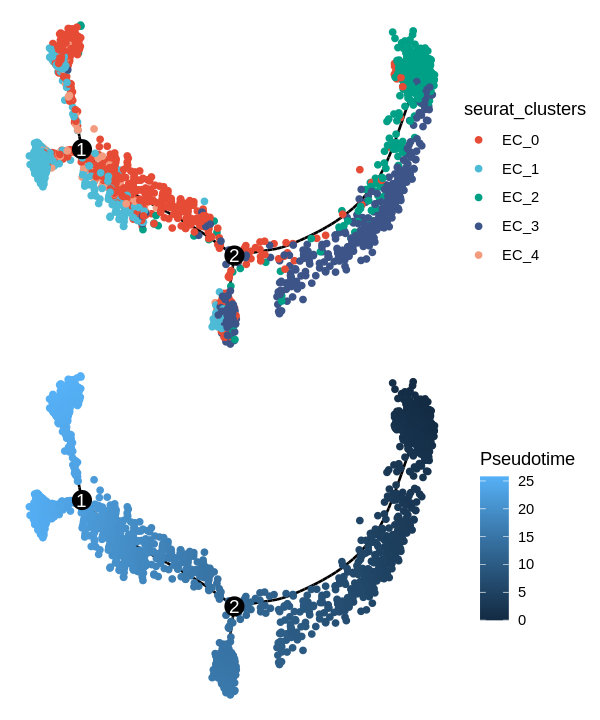

In [377]:
options(repr.plot.height = 6, repr.plot.width = 5)
p1/p3
ggsave(filename = 'ec_psdtime.pdf', width = 5, height = 6)

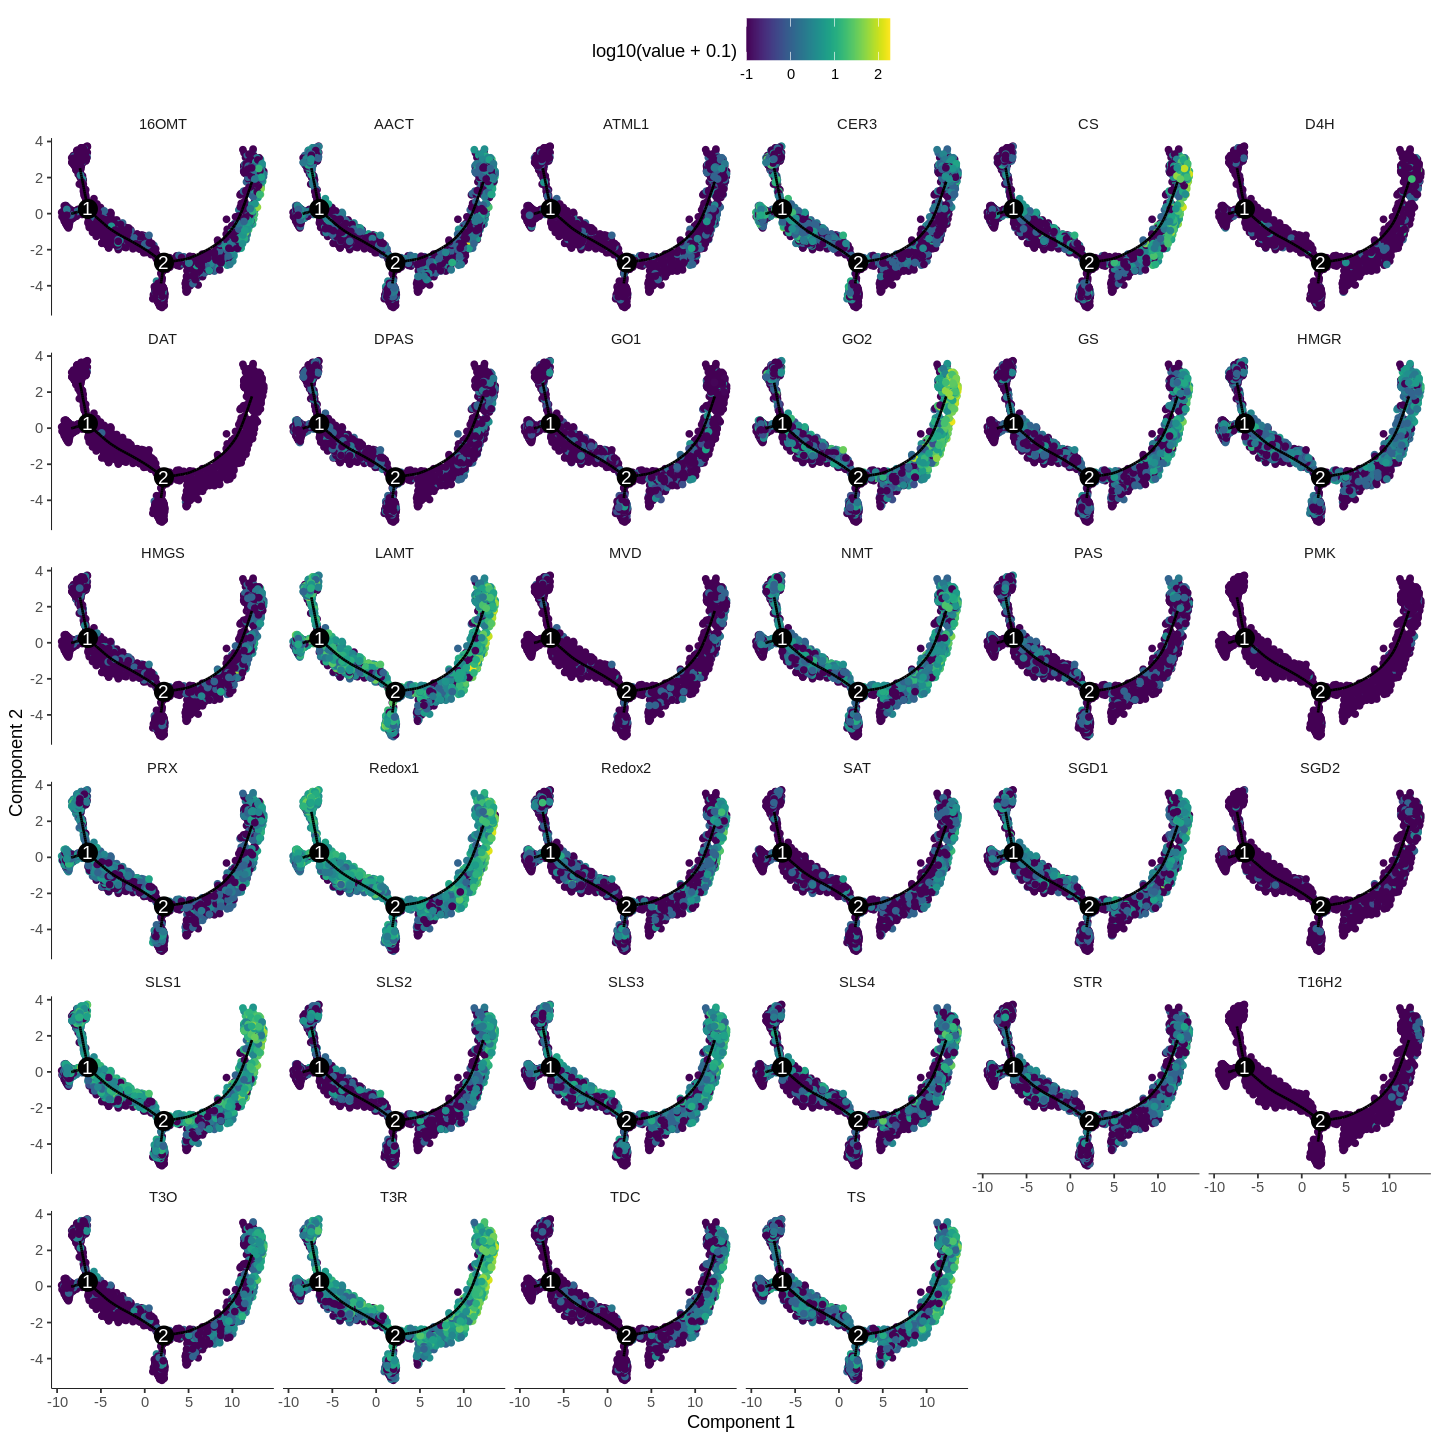

In [387]:
options(repr.plot.height = 12, repr.plot.width = 12)
p_pathway_psd <-
  plot_cell_trajectory(cds,
  markers = vc.id,
  use_color_gradient = T
)

for (i in seq_along(vc.id))
    p_pathway_psd$data$feature_label[
        p_pathway_psd$data$gene_short_name == vc.id[i]
    ] <- vc.name[i]

p_pathway_psd

### Clustering Genes by Pseudotemporal Expression Pattern

In [323]:
diff_test_res <- differentialGeneTest(cds,
              fullModelFormulaStr = "~sm.ns(Pseudotime)",
              cores = 20)
sig_gene_names <- row.names(subset(diff_test_res, qval < 0.1))

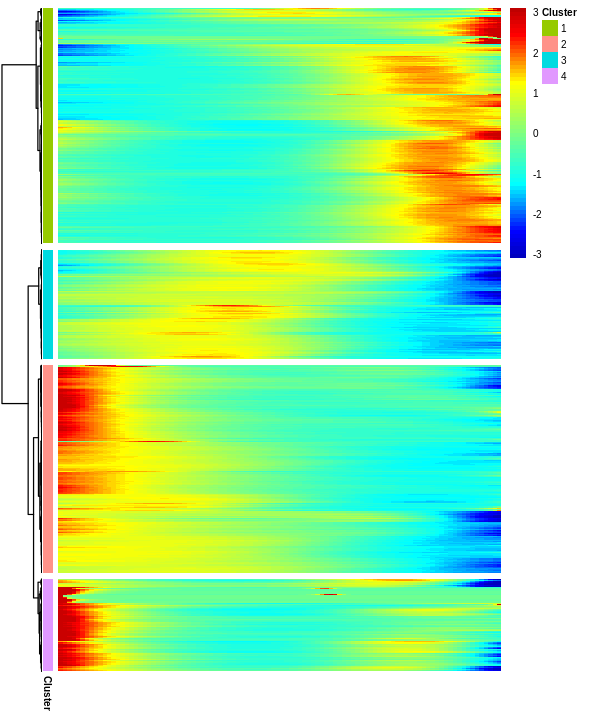

In [341]:
vc_heat <- plot_pseudotime_heatmap(cds[sig_gene_names,],
                num_clusters = 4,
                cores = 20,
                show_rownames = F,
                return_heatmap = T)

In [342]:
pdf(file = 'ec_psdheatmap.pdf', width = 4, height = 5)
vc_heat
dev.off()

png 
  2

In [190]:
getwd()

[1] "/home/Matthew/00_scripts/scrna"

## Extract genes in heatmap clusters to perform GO enrichment

In [343]:
vc_heat$tree_row


Call:
hclust(d = d, method = method)

Cluster method   : ward.D2 
Number of objects: 10563 


In [344]:
clusters <- cutree(vc_heat$tree_row, k = 4)
clustering <- data.frame(clusters)
clustering[,1] <- as.character(clustering[,1])
colnames(clustering) <- "cluster"
table(clustering)

clustering
   1    2    3    4 
3860 3403 1786 1514 

In [345]:
head(clustering)

cluster
EVM0032325 1      
EVM0008173 2      
EVM0035514 2      
EVM0034293 2      
EVM0017897 3      
EVM0033310 1

In [346]:
write.csv(clustering, file = 'ec_psddeg.csv')

## Plotting genes in pseudotime

In [96]:
cds_ec_feature <- cds[vc.id,]
fData(cds_ec_feature)$gene_short_name <- vc.name
fData(cds_ec_feature)$gene_short_name

[1] "TDC"    "AACT"   "HMGS"   "HMGR"   "PMK"    "MVD"    "LAMT"   "SLS1"  
 [9] "SLS2"   "SLS3"   "SLS4"   "STR"    "SGD1"   "SGD2"   "GS"     "GO1"   
[17] "GO2"    "Redox1" "Redox2" "SAT"    "PAS"    "DPAS"   "CS"     "TS"    
[25] "T16H2"  "16OMT"  "T3O"    "T3R"    "PRX"

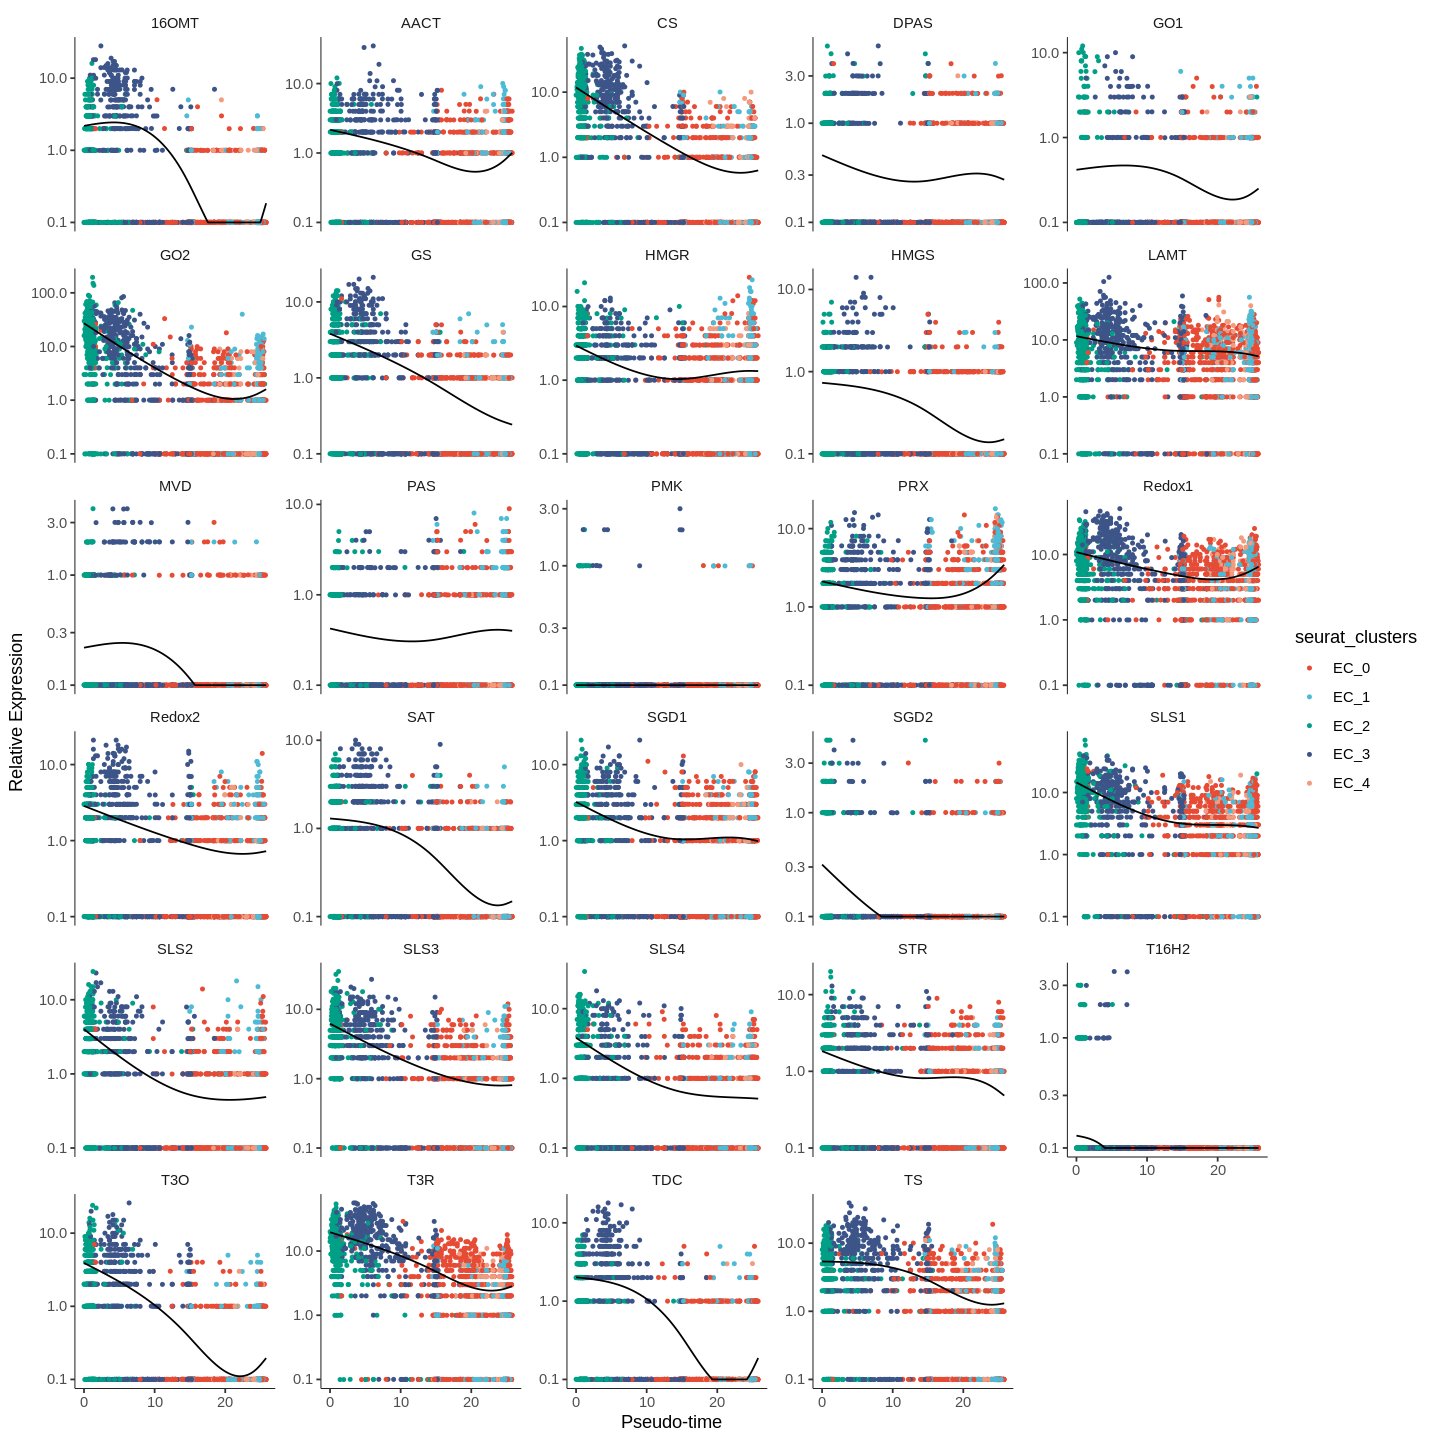

In [99]:
options(repr.plot.height = 12, repr.plot.width = 12)

p_gene_kinetic <- plot_genes_in_pseudotime(cds_ec_feature,
                         color_by = "seurat_clusters",
                         ncol= 5,
                         horizontal_jitter = F) + scale_color_npg()
p_gene_kinetic
ggsave('ec_gene_psd.png', height = 12, width = 12, dpi = 300)